# Question 3: CNN 
Choose a topic in classification (such as: brand classification, cosmetic classification, traditional costumes classification, healthy and unhealthy dishes classification...) => apply CNN to build a model to classify class of each sample.

### Phân loại chai (chai nhựa/ thuỷ tinh) và lon

# 0. Mount drive & import packages

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question3_CNN'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DamThiMinhPhuong/LDS8_K270_DamThiMinhPhuong_Cuoi_ky/Question3_CNN


In [10]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
import numpy as np
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout , BatchNormalization

In [5]:
import warnings
warnings.filterwarnings('ignore')

# 1. Read and pre-process images

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = train_datagen.flow_from_directory('new_dataset2/train',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary'
                                                )
test_set = test_datagen.flow_from_directory('new_dataset2/test',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 6937 images belonging to 2 classes.
Found 1401 images belonging to 2 classes.


# 2. Build the CNN network

### 2.1 Model 1

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:
#Step1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=3,
                     input_shape=(64,64,3), activation='relu', padding='same', strides=1))

In [ ]:
#Step2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

In [ ]:
# Adding a second convolutional layer & pooling
classifier.add(Conv2D(filters=32, kernel_size=3,
                     activation='relu', padding='same', strides=1))
classifier.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

In [ ]:
#Step3 - Flattening
classifier.add(Flatten())

In [ ]:
#Step4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
#Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
 classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

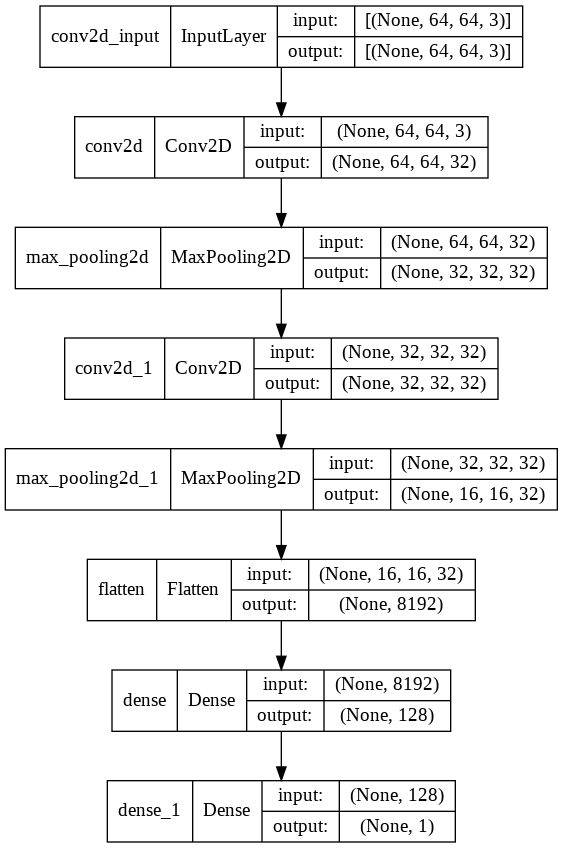

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image 
plot_model(classifier, to_file='cat_bottle_model1.png', show_shapes=True)
Image(filename='cat_bottle_model1.png')

In [ ]:
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=12),
             ModelCheckpoint('model_checkpoint.h5',
                             save_best_only=True)]

In [ ]:
from datetime import datetime
t0 = datetime.now()
print(t0)

2021-11-03 21:41:09.031605


In [ ]:
# if batch_size = 1 => 1 epoch se co so batch = so mau
history = classifier.fit(training_set, epochs=50,
                        validation_data = test_set,
                        callbacks = callbacks)

Epoch 1/50
217/217 [==============================] - 2826s 13s/step - loss: 0.5886 - accuracy: 0.6891 - val_loss: 0.5167 - val_accuracy: 0.7530
Epoch 2/50
217/217 [==============================] - 175s 808ms/step - loss: 0.4589 - accuracy: 0.7838 - val_loss: 0.4506 - val_accuracy: 0.8030
Epoch 3/50
217/217 [==============================] - 173s 796ms/step - loss: 0.4199 - accuracy: 0.8041 - val_loss: 0.3403 - val_accuracy: 0.8401
Epoch 4/50
217/217 [==============================] - 175s 805ms/step - loss: 0.3955 - accuracy: 0.8176 - val_loss: 0.3696 - val_accuracy: 0.8380
Epoch 5/50
217/217 [==============================] - 173s 796ms/step - loss: 0.3684 - accuracy: 0.8318 - val_loss: 0.2829 - val_accuracy: 0.8879
Epoch 6/50
217/217 [==============================] - 174s 800ms/step - loss: 0.3415 - accuracy: 0.8450 - val_loss: 0.3321 - val_accuracy: 0.8608
Epoch 7/50
217/217 [==============================] - 174s 802ms/step - loss: 0.3289 - accuracy: 0.8558 - val_loss: 0.2886 - 

In [ ]:
t1 = datetime.now()
print('Duration:',t1-t0)

Duration: 2:36:03.046092


In [ ]:
import pandas as pd 
history_frame = pd.DataFrame(history.history)

In [ ]:
history_frame.tail()

,loss,accuracy,val_loss,val_accuracy
29,0.075796,0.972899,0.217958,0.931477
30,0.079011,0.970304,0.260079,0.920771
31,0.072572,0.973331,0.228233,0.942184
32,0.071317,0.972899,0.209636,0.947894
33,0.071665,0.975205,0.237328,0.927195


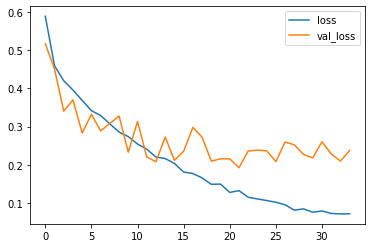

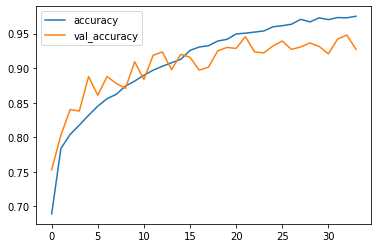

In [ ]:
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
#save model
from tensorflow.keras.models import load_model
#Creates a HDF5 file
classifier.save('model_can_bottle_classification_1c.h5')
print('Saved!!')

Saved!!


### 2.2 Model 2

In [ ]:
#change batch_size from 32 to 64
training_set2 = train_datagen.flow_from_directory('new_dataset2/train',
                                                 target_size=(64,64),
                                                 batch_size=64,
                                                 class_mode='binary'
                                                )
test_set2 = test_datagen.flow_from_directory('new_dataset2/test',
                                                 target_size=(64,64),
                                                 batch_size=64,
                                                 class_mode='binary')

Found 6937 images belonging to 2 classes.
Found 1401 images belonging to 2 classes.


In [ ]:
# Initialising the CNN
classifier2 = Sequential()

In [ ]:
#Step1 - Convolution - with 64 filters
classifier2.add(Conv2D(filters=64, kernel_size=3,
                     input_shape=(64,64,3), activation='relu', padding='same', strides=1))

In [ ]:
#Step2 - Pooling
classifier2.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

In [ ]:
# Adding a second convolutional layer & pooling
classifier2.add(Conv2D(filters=64, kernel_size=3,
                     activation='relu', padding='same', strides=1))
classifier2.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))

In [ ]:
#Step3 - Flattening
classifier2.add(Flatten())

In [ ]:
#Step4 - Full connection - increase unit & add 1 more layer
classifier2.add(Dense(units=1024, activation='relu'))
classifier2.add(Dense(units=1024, activation='relu'))
classifier2.add(Dense(units=1, activation='sigmoid'))

In [ ]:
 classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

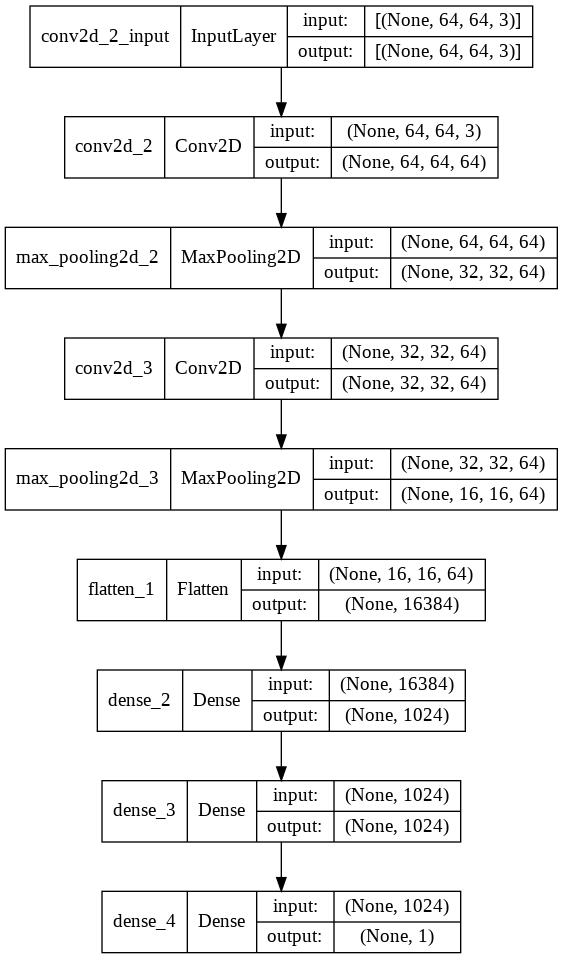

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image 
plot_model(classifier2, to_file='cat_bottle_model2.png', show_shapes=True)
Image(filename='cat_bottle_model2.png')

In [ ]:
#Compiling the CNN
classifier2.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
callbacks2 = [EarlyStopping(monitor='val_loss',min_delta=0.01,
                           patience=12),
             ModelCheckpoint('model_checkpoint2.h5',
                             save_best_only=True)]

In [ ]:
from datetime import datetime
t0 = datetime.now()
print(t0)

2021-11-04 00:17:14.092399


In [ ]:
history2 = classifier2.fit(training_set2, epochs=50,
                        validation_data = test_set2,
                        callbacks = callbacks2)

Epoch 1/50
109/109 [==============================] - 215s 2s/step - loss: 0.6437 - accuracy: 0.6578 - val_loss: 0.4471 - val_accuracy: 0.8144
Epoch 2/50
109/109 [==============================] - 213s 2s/step - loss: 0.4885 - accuracy: 0.7647 - val_loss: 0.4164 - val_accuracy: 0.8130
Epoch 3/50
109/109 [==============================] - 213s 2s/step - loss: 0.4220 - accuracy: 0.8042 - val_loss: 0.3637 - val_accuracy: 0.8508
Epoch 4/50
109/109 [==============================] - 211s 2s/step - loss: 0.3869 - accuracy: 0.8283 - val_loss: 0.4059 - val_accuracy: 0.8116
Epoch 5/50
109/109 [==============================] - 216s 2s/step - loss: 0.3443 - accuracy: 0.8494 - val_loss: 0.2966 - val_accuracy: 0.8744
Epoch 6/50
109/109 [==============================] - 214s 2s/step - loss: 0.3200 - accuracy: 0.8569 - val_loss: 0.3047 - val_accuracy: 0.8687
Epoch 7/50
109/109 [==============================] - 214s 2s/step - loss: 0.2922 - accuracy: 0.8723 - val_loss: 0.3247 - val_accuracy: 0.8651

In [ ]:
t1 = datetime.now()
print(t1)
print('Duration:',t1-t0)

2021-11-04 01:50:18.409529
Duration: 1:33:04.317130


In [ ]:
history_frame2 = pd.DataFrame(history2.history)
history_frame2.tail()

,loss,accuracy,val_loss,val_accuracy
18,0.105293,0.957907,0.283745,0.917916
19,0.096941,0.965835,0.312321,0.922912
20,0.088563,0.965835,0.346075,0.918630
21,0.077257,0.971025,0.283379,0.929336
22,0.081009,0.970016,0.364024,0.910064


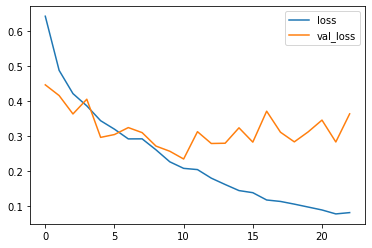

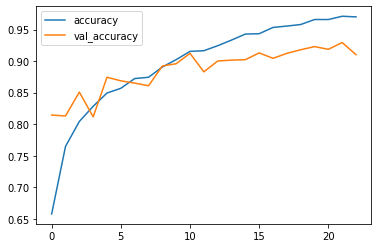

In [ ]:
history_frame2.loc[:,['loss','val_loss']].plot()
history_frame2.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
#Creates a HDF5 file
classifier2.save('model_can_bottle_classification_2c.h5')
print('Saved!!')

Saved!!


### 2.3 Model 3

In [ ]:
#change batch_size from 32 to 64
training_set3 = train_datagen.flow_from_directory('new_dataset2/train',
                                                 target_size=(64,64),
                                                 batch_size=128,
                                                 class_mode='binary'
                                                )
test_set3 = test_datagen.flow_from_directory('new_dataset2/test',
                                                 target_size=(64,64),
                                                 batch_size=128,
                                                 class_mode='binary')

Found 6937 images belonging to 2 classes.
Found 1401 images belonging to 2 classes.


In [ ]:
# Initialising the CNN
classifier3 = Sequential()

In [ ]:
#Step1 - Convolution - with 64 filters
classifier3.add(Conv2D(filters=64, kernel_size=3,
                     input_shape=(64,64,3), activation='relu', padding='same', strides=1))

In [ ]:
#Step2 - Pooling
classifier3.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
classifier3.add(Dropout(0.5))

In [ ]:
# Adding the 2nd convolutional layer & pooling
classifier3.add(Conv2D(filters=64, kernel_size=3,
                     activation='relu', padding='same', strides=1))
classifier3.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
classifier3.add(Dropout(0.5))

In [ ]:
# Adding the 3rd convolutional layer & pooling
classifier3.add(Conv2D(filters=64, kernel_size=3,
                     activation='relu', padding='same', strides=1))
classifier3.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
classifier3.add(Dropout(0.5))

In [ ]:
# Adding the 4th convolutional layer & pooling
classifier3.add(Conv2D(filters=64, kernel_size=3,
                     activation='relu', padding='same', strides=1))
classifier3.add(MaxPooling2D(pool_size=(2,2), padding='valid', strides=2))
classifier3.add(Dropout(0.5))

In [ ]:
#Step3 - Flattening
classifier3.add(Flatten())

In [ ]:
#Step4 - Full connection - increase unit & add 1 more layer
classifier3.add(Dense(units=1024, activation='relu'))
classifier3.add(Dense(units=1024, activation='relu'))
classifier3.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)       

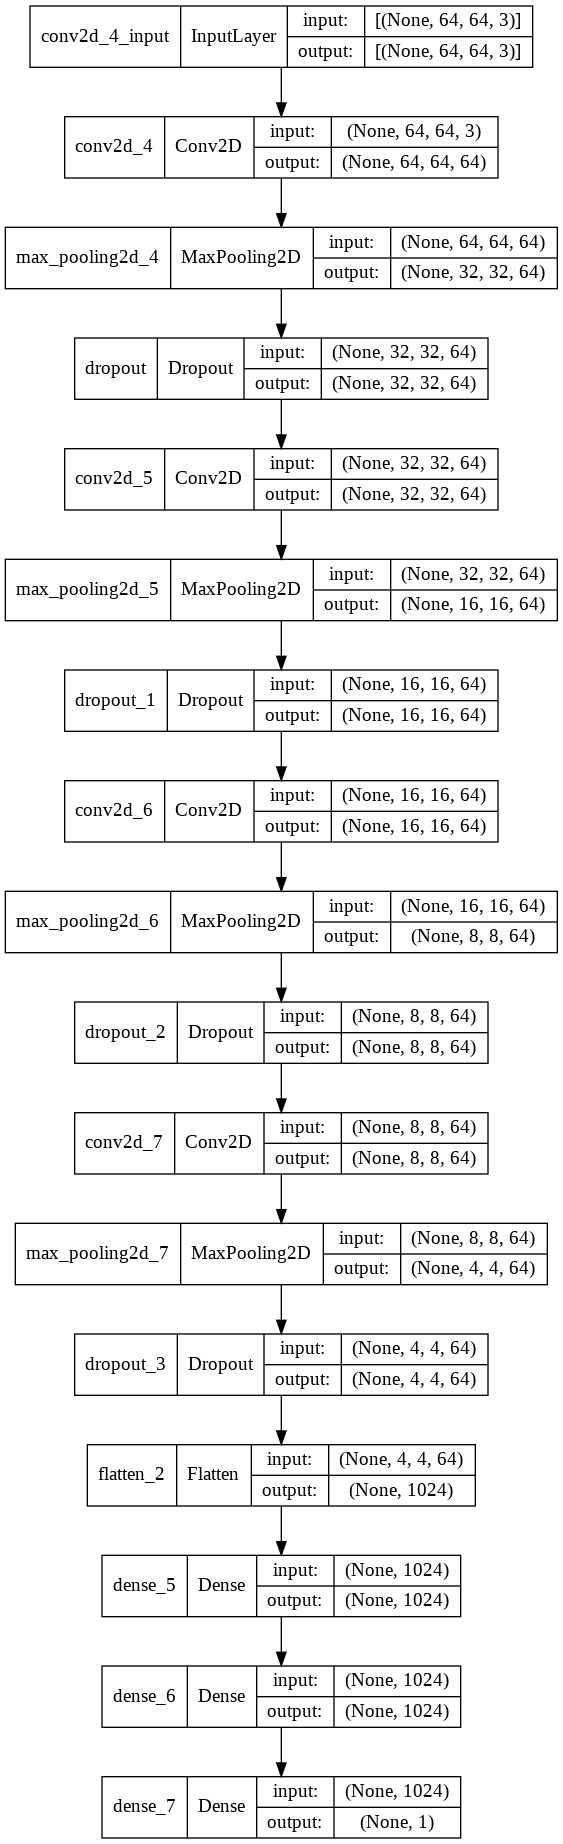

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image 
plot_model(classifier3, to_file='cat_bottle_model3.png', show_shapes=True)
Image(filename='cat_bottle_model3.png')

In [ ]:
#Compiling the CNN
classifier3.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
callbacks3 = [EarlyStopping(monitor='val_loss',min_delta=0.01,
                           patience=12),
             ModelCheckpoint('model_checkpoint3.h5',
                             save_best_only=True)]

In [ ]:
from datetime import datetime
t0 = datetime.now()
print(t0)

2021-11-04 01:51:00.829975


In [ ]:
history3 = classifier3.fit(training_set3, epochs=50,
                        validation_data = test_set3,
                        callbacks = callbacks3)

Epoch 1/50
55/55 [==============================] - 222s 4s/step - loss: 0.7324 - accuracy: 0.5592 - val_loss: 0.6932 - val_accuracy: 0.4996
Epoch 2/50
55/55 [==============================] - 215s 4s/step - loss: 0.6690 - accuracy: 0.5892 - val_loss: 0.6805 - val_accuracy: 0.6945
Epoch 3/50
55/55 [==============================] - 215s 4s/step - loss: 0.6399 - accuracy: 0.6500 - val_loss: 0.6320 - val_accuracy: 0.6660
Epoch 4/50
55/55 [==============================] - 213s 4s/step - loss: 0.6063 - accuracy: 0.6879 - val_loss: 0.5784 - val_accuracy: 0.6902
Epoch 5/50
55/55 [==============================] - 214s 4s/step - loss: 0.5853 - accuracy: 0.7029 - val_loss: 0.5446 - val_accuracy: 0.7445
Epoch 6/50
55/55 [==============================] - 217s 4s/step - loss: 0.5519 - accuracy: 0.7314 - val_loss: 0.5473 - val_accuracy: 0.7266
Epoch 7/50
55/55 [==============================] - 219s 4s/step - loss: 0.5376 - accuracy: 0.7388 - val_loss: 0.5098 - val_accuracy: 0.7723
Epoch 8/50
55

In [ ]:
t1 = datetime.now()
print(t1)
print('Duration:',t1-t0)

2021-11-04 04:06:55.193016
Duration: 2:15:54.363041


In [ ]:
history_frame3 = pd.DataFrame(history3.history)
history_frame3.tail()

,loss,accuracy,val_loss,val_accuracy
29,0.329242,0.855557,0.395333,0.820129
30,0.323857,0.860170,0.441760,0.793719
31,0.313245,0.861179,0.457436,0.788009
32,0.319879,0.855701,0.707240,0.715917
33,0.307951,0.862621,0.435113,0.802998


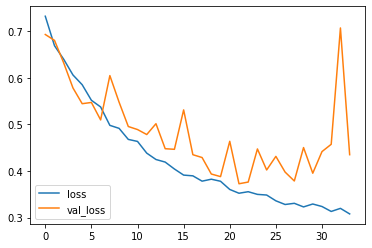

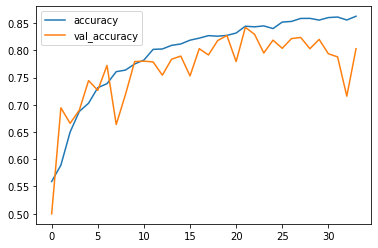

In [ ]:
history_frame3.loc[:,['loss','val_loss']].plot()
history_frame3.loc[:,['accuracy','val_accuracy']].plot()

In [ ]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image 
# plot_model(classifer, to_file='CNN_model_27102021.png', show_shapes=True)
# Image(filename='CNN_model_27102021.png')

In [ ]:
#Creates a HDF5 file
classifier3.save('model_can_bottle_classification_3c.h5')
print('Saved!!')

Saved!!


# 3. Load model & Conclusion

In [9]:
# Load 3 models để evaluate (em lỡ tắ file mà chưa tính evaluate nên em load model vô để tính ạ!)
from tensorflow.keras.models import load_model
model1 = load_model('model_can_bottle_classification_1c.h5')
model2 = load_model('model_can_bottle_classification_2c.h5')
model3 = load_model('model_can_bottle_classification_3c.h5')

In [ ]:
# Evaluation on train & test
#model1
result1_train = model1.evaluate(training_set)
result1_val = model1.evaluate(test_set)
result1_df = pd.DataFrame([result1_train[0],result1_train[1],result1_val[0],result1_val[1]], 
                            index=['loss','accuracy', 'val_loss','val_accuracy'], 
                           columns=['model1'])
result1_df = result1_df.T

44/44 [==============================] - 464s 11s/step - loss: 0.2373 - accuracy: 0.9272


In [ ]:
result3_train = model3.evaluate(training_set3)
result3_val = model3.evaluate(test_set3)
result3_df = pd.DataFrame([result3_train[0],result3_train[1],result3_val[0],result3_val[1]], 
                            index=['loss','accuracy', 'val_loss','val_accuracy'], 
                           columns=['model3'])
result3_df = result3_df.T

22/22 [==============================] - 12s 570ms/step - loss: 0.4351 - accuracy: 0.8030


In [ ]:
result2_train = model2.evaluate(training_set2)
result2_val = model2.evaluate(test_set2)
result2_df = pd.DataFrame([result2_train[0],result2_train[1],result2_val[0],result2_val[1]], 
                            index=['loss','accuracy', 'val_loss','val_accuracy'], 
                           columns=['model2'])
result2_df = result2_df.T

22/22 [==============================] - 12s 568ms/step - loss: 0.3640 - accuracy: 0.9101


### Nhận xét:
- Model 1 cho kết quả tốt nhất trong 3 model (train cao hơn và loss thấp hơn). 
- Chênh lệch giữa train và test ~5% là khoảng chênh lệch có thể chấp nhận được. 
- => Chọn model 1